## WTF TF-IDF?
If we want to perform calculations on words, [n-grams](http://en.wikipedia.org/wiki/N-gram), sentences or whole catalogs, we need to somehow convert these into numbers. Term Frequency – Inverse Document Frequency ([TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf)) does just that. A TF-IDF score is a numerical representation of how important a word is to a document in a [text corpus](http://en.wikipedia.org/wiki/Text_corpus) (collection). It effectively lowers the weight of stopwords in favor of words that are much more meaningful in describing the document.

The **TF score** of a word is the number of times the term $t$ appears in a document $d$ divided by the total number of words $w$ in the document:

$$
tf_{(t,d)}=\frac{f_d(t)}{\max\limits_{w\in d}f_d(w)}
$$

The **IDF score** is the log of the number of documents $D$ (corpus) divided by the number of documents $d$ that contain term $t$. We take the log to emphasise the importance of non-common terms. These are describing terms occurring only in some of the documents in the corpus. 

$$
idf_{(t,D)}=\log\Bigg({\frac{|D|}{|\{d\in D:t\in d\}|}}\Bigg)
$$

The **TF-IDF** score is the multiplication of the TF and the IDF score:

$$
tfidf_{(t, d, D)}=tf_{(t,d)}\cdot idf_{(t,D)}
$$


# Proof of concept

 calculate the TF-IDF scores of the words in a corpus of three documents with nine words each (for simplicity).

In [11]:
import sys
import string
import pandas as pd
import math
from __future__ import print_function

In [12]:
# Corpus of three documents
doc1 = 'The man bought a pair of shoes while on a holiday in French'
doc2 = 'A young girl went on a short holiday to the islands'
doc3 = 'The man and the girl formed a nice young couple'

doc1 = doc1.lower().split()
doc2 = doc2.lower().split()
doc3 = doc3.lower().split()
print(doc1)

['the', 'man', 'bought', 'a', 'pair', 'of', 'shoes', 'while', 'on', 'a', 'holiday', 'in', 'french']


## Term Frequency
First we focus on each document separately. Count the number of times a word appears in the text. Normalize the scores for each word in the dictionary by dividing by the total number of words in the document.

In [13]:
# Calculate Term Frequency for a document
def tf(doc):
    result = {}
    doc_size = len(doc)
    
    for term in doc:
        if term in result:
            result[term] += 1
        else:
            result[term] = 1
    
    for term in result:
        result[term] = result[term] / doc_size
        
    return result

tf_doc1 = tf(doc1)
tf_doc2 = tf(doc2)
tf_doc3 = tf(doc3)
tf_doc1

{'the': 0.07692307692307693,
 'man': 0.07692307692307693,
 'bought': 0.07692307692307693,
 'a': 0.15384615384615385,
 'pair': 0.07692307692307693,
 'of': 0.07692307692307693,
 'shoes': 0.07692307692307693,
 'while': 0.07692307692307693,
 'on': 0.07692307692307693,
 'holiday': 0.07692307692307693,
 'in': 0.07692307692307693,
 'french': 0.07692307692307693}

The term 'a' has the highest frequency of 0.15 in document 1 because it appears twice.

## Inverse Document Frequency
Calculate the Inverse Document Frequency for each word in each document. We do this by dividing the size of the document corpus by the number of documents containing the term.

In [14]:
def idf(doc, corpus):
    result = {}
    corpus_size = len(corpus)
    words_done = []
    
    for term in doc:
        if term in words_done:
            continue

        for corpus_doc in corpus:
            if term in corpus_doc:
                if term in result:
                    result[term] += 1
                else:
                    result[term] = 1

            words_done.append(term)

    for term in result:
        result[term] = math.log10(corpus_size / result[term])

    return result
        
idf_doc1 = idf(doc1, [doc1, doc2, doc3])
idf_doc2 = idf(doc2, [doc1, doc2, doc3])
idf_doc3 = idf(doc3, [doc1, doc2, doc3])
idf_doc1

{'the': 0.0,
 'man': 0.17609125905568124,
 'bought': 0.47712125471966244,
 'a': 0.0,
 'pair': 0.47712125471966244,
 'of': 0.47712125471966244,
 'shoes': 0.47712125471966244,
 'while': 0.47712125471966244,
 'on': 0.17609125905568124,
 'holiday': 0.17609125905568124,
 'in': 0.47712125471966244,
 'french': 0.47712125471966244}

The term 'a' and 'the' have a IDF score of zero, because they appear in each document. The term 'shoes', however, has a much higher score, since it only appears in one document in the corpus.

## TF-IDF Scores for each Document
By multiplying the TF and IDF we get a score for each word relative to the document *and* the corpus. The higher the score, the higher the importance of the word.

In [15]:
def tf_idf(tf, idf):
    result = {}
    
    for term in tf:
        result[term] = idf[term] * tf[term]
    
    return result

tf_idf(tf_doc1, idf_doc1)

{'the': 0.0,
 'man': 0.013545481465821635,
 'bought': 0.03670163497843557,
 'a': 0.0,
 'pair': 0.03670163497843557,
 'of': 0.03670163497843557,
 'shoes': 0.03670163497843557,
 'while': 0.03670163497843557,
 'on': 0.013545481465821635,
 'holiday': 0.013545481465821635,
 'in': 0.03670163497843557,
 'french': 0.03670163497843557}

We see that doc1 is mostly about shoes, French, bought, pair. Note that stopwords like 'in' and 'on' would be filtered out in a real-world corpus with scores close to zero.

In [16]:
tf_idf(tf_doc2, idf_doc2)

{'a': 0.0,
 'young': 0.016008296277789203,
 'girl': 0.016008296277789203,
 'went': 0.043374659519969314,
 'on': 0.016008296277789203,
 'short': 0.043374659519969314,
 'holiday': 0.016008296277789203,
 'to': 0.043374659519969314,
 'the': 0.0,
 'islands': 0.043374659519969314}

When we look at doc2, we see it's about short, went, islands.

In [17]:
tf_idf(tf_doc3, idf_doc3)

{'the': 0.0,
 'man': 0.017609125905568124,
 'and': 0.047712125471966245,
 'girl': 0.017609125905568124,
 'formed': 0.047712125471966245,
 'a': 0.0,
 'nice': 0.047712125471966245,
 'young': 0.017609125905568124,
 'couple': 0.047712125471966245}

Finally doc3 is about nice, couple and formed.

## Cleaning HTML in Google+ content by stripping out HTML tags and converting HTML entities back to plain-text representations

In [1]:
from bs4 import BeautifulSoup # pip install beautifulsoup4

def cleanHtml(html):
    if html == "": return ""

    return BeautifulSoup(html, 'html5lib').get_text()

txt = "Don&#39;t forget about HTML entities and <strong>markup</strong> when "+\
      "mining text!<br />"

print(cleanHtml(txt))

Don't forget about HTML entities and markup when mining text!


## Sample data structures used in illustrations for the rest of this chapter

In [2]:
corpus = {
 'a' : "Mr. Green killed Colonel Mustard in the study with the candlestick. \
Mr. Green is not a very nice fellow.",
 'b' : "Professor Plum has a green plant in his study.",
 'c' : "Miss Scarlett watered Professor Plum's green plant while he was away \
from his office last week."
}
terms = {
 'a' : [ i.lower() for i in corpus['a'].split() ], 
 'b' : [ i.lower() for i in corpus['b'].split() ],
 'c' : [ i.lower() for i in corpus['c'].split() ]
 }

## Running TF-IDF on sample data

In [3]:
from math import log

# Enter in a query term from the corpus variable
QUERY_TERMS = ['mr.', 'green']

def tf(term, doc, normalize=True):
    doc = doc.lower().split()
    if normalize:
        return doc.count(term.lower()) / float(len(doc))
    else:
        return doc.count(term.lower()) / 1.0

def idf(term, corpus):
    num_texts_with_term = len([True for text in corpus if term.lower()
                              in text.lower().split()])

    # tf-idf calc involves multiplying against a tf value less than 0, so it's
    # necessary to return a value greater than 1 for consistent scoring.
    # (Multiplying two values less than 1 returns a value less than each of
    # them.)

    try:
        return 1.0 + log(float(len(corpus)) / num_texts_with_term)
    except ZeroDivisionError:
        return 1.0

def tf_idf(term, doc, corpus):
    return tf(term, doc) * idf(term, corpus)

corpus = \
    {'a': 'Mr. Green killed Colonel Mustard in the study with the candlestick. \
Mr. Green is not a very nice fellow.',
     'b': 'Professor Plum has a green plant in his study.',
     'c': "Miss Scarlett watered Professor Plum's green plant while he was away \
from his office last week."}

for (k, v) in sorted(corpus.items()):
    print(k, ':', v)
print()
    
# Score queries by calculating cumulative tf_idf score for each term in query

query_scores = {'a': 0, 'b': 0, 'c': 0}
for term in [t.lower() for t in QUERY_TERMS]:
    for doc in sorted(corpus):
        print('TF({0}): {1}'.format(doc, term), tf(term, corpus[doc]))
    print('IDF: {0}'.format(term), idf(term, corpus.values()))
    print()

    for doc in sorted(corpus):
        score = tf_idf(term, corpus[doc], corpus.values())
        print('TF-IDF({0}): {1}'.format(doc, term), score)
        query_scores[doc] += score
    print()

print("Overall TF-IDF scores for query '{0}'".format(' '.join(QUERY_TERMS)))
for (doc, score) in sorted(query_scores.items()):
    print(doc, score)

a : Mr. Green killed Colonel Mustard in the study with the candlestick. Mr. Green is not a very nice fellow.
b : Professor Plum has a green plant in his study.
c : Miss Scarlett watered Professor Plum's green plant while he was away from his office last week.

TF(a): mr. 0.10526315789473684
TF(b): mr. 0.0
TF(c): mr. 0.0
IDF: mr. 2.09861228866811

TF-IDF(a): mr. 0.22090655670190631
TF-IDF(b): mr. 0.0
TF-IDF(c): mr. 0.0

TF(a): green 0.10526315789473684
TF(b): green 0.1111111111111111
TF(c): green 0.0625
IDF: green 1.0

TF-IDF(a): green 0.10526315789473684
TF-IDF(b): green 0.1111111111111111
TF-IDF(c): green 0.0625

Overall TF-IDF scores for query 'mr. green'
a 0.3261697145966431
b 0.1111111111111111
c 0.0625


## Exploring text data with NLTK

In [4]:
# Explore some of NLTK's functionality by exploring the data.
# Here are some suggestions for an interactive interpreter session.

import json
import nltk

# Download ancillary nltk packages if not already installed
nltk.download('stopwords')

# Load in human language data from wherever you've saved it
DATA = 'resources/ch05-textfiles/ch05-timoreilly.json'
data = json.loads(open(DATA).read())

# Combine titles and post content
all_content = " ".join([ i['title'] + " " + i['content'] for i in data ])

# Approximate bytes of text
print(len(all_content))

tokens = all_content.split()
text = nltk.Text(tokens)

# Examples of the appearance of the word "open"
text.concordance("open")

# Frequent collocations in the text (usually meaningful phrases)
text.collocations()

# Frequency analysis for words of interest
fdist = text.vocab()
print(fdist["open"])
print(fdist["source"])
print(fdist["web"])
print(fdist["2.0"])

# Number of words in the text
print('Number of tokens:', len(tokens))

# Number of unique words in the text
print('Number of unique words:', len(fdist.keys()))

# Common words that aren't stopwords
print('Common words that aren\'t stopwords')
print([w for w in list(fdist.keys())[:100]
   if w.lower() not in nltk.corpus.stopwords.words('english')])

# Long words that aren't URLs
print('Long words that aren\'t URLs')
print([w for w in fdist.keys() if len(w) > 15 and 'http' not in w])

# Number of URLs
print('Number of URLs: ',len([w for w in fdist.keys() if 'http' in w]))

# Top 10 Most Common Words
print('Top 10 Most Common Words')
print(fdist.most_common(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emyhr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

131031
Displaying 16 of 16 matches:
s, and how at least one team is using open source to let others see inside the b
hear that computational biologist and open science advocate (UC Berkeley profess
hear that computational biologist and open science advocate (UC Berkeley profess
e: magazine slogan say, "If you can't open it, you don't own it." Predictive pol
y I'm proud to be a signatory to this open letter calling for this key policy in
ast, I've focused a lot on areas like open source software and the implications 
topic at greater length in my article Open Data and Algorithmic Regulation: http
ccessful participatory projects, from open source software to wikis to social me
here isn't one (except that it's only open to US students - sorry. If anyone has
 new contract that conformed with the open data mandate. If it were consistent w
 If it were consistent with the Obama open data guidance, that RFP would require
out of step with the administration’s open data policy.The founder of Hip

## Querying text data with TF-IDF

In [5]:
import json
import nltk

# Provide your own query terms here

QUERY_TERMS = ['Government']

# Load in human language data from wherever you've saved it
DATA = 'resources/ch05-textfiles/ch05-timoreilly.json'
data = json.loads(open(DATA).read())

activities = [post['content'].lower().split() 
              for post in data 
                if post['content'] != ""]

# TextCollection provides tf, idf, and tf_idf abstractions so
# that we don't have to maintain/compute them ourselves

tc = nltk.TextCollection(activities)

relevant_activities = []

for idx in range(len(activities)):
    score = 0
    for term in [t.lower() for t in QUERY_TERMS]:
        score += tc.tf_idf(term, activities[idx])
    if score > 0:
        relevant_activities.append({'score': score, 'title': data[idx]['title']})

# Sort by score and display results

relevant_activities = sorted(relevant_activities,
                             key=lambda p: p['score'], reverse=True)
for activity in relevant_activities:
    print('Title: {0}'.format(activity['title']))
    print('Score: {0}'.format(activity['score']))
    print()

Title: Totally hilarious and spot-on. Has to be the best public service video ever done by a government office...
Score: 0.10660131264074077

Title: Excellent set of principles for digital government. Echoes those put forward by the UK Government and...
Score: 0.10250126215455843

Title: "We need to show every American competent government services they can actually use, services that treat...
Score: 0.09517974342923281

Title: If you're interested about the emerging startup ecosystem around government transformation (a $172 Billion...
Score: 0.09189768331098341

Title: I'm proud to be a judge for the new +Code for America tech awards. If you are doing something remarkable...
Score: 0.08737812511536129

Title: This is a wonderful analysis of a set of anti-patterns in enterprise software development. While it ...
Score: 0.057935496000402584

Title: Fundraiser for Libby Schaaf for Mayor of Oakland at the BlueSprout industrial co working space. Oakland...
Score: 0.057935496000402584

Titl

## Finding similar documents using cosine similarity

The dot product of two vectors __A__ and **B** can be thought of as a projection of one vector into the other.
<img src="resources/ch05-textfiles/dot_product.png">

By measuring how much of **A** is in the same direction as **B**, we get a measure of how similar **A** is to **B**. The idea behind the following exercise is to create vectors for each document in our corpus consisting of the TF-IDF scores of the terms in those documents:

```
v_1 = [ tf_idf(term_1, doc_1), tf_idf(term_2, doc_1), ..., tf_idf(term_n, doc_1) ]
v_2 = [ tf_idf(term_1, doc_2), tf_idf(term_2, doc_2), ..., tf_idf(term_n, doc_2) ]
```

The dot product of these vectors:

$\mathbf{v_1} \cdot \mathbf{v_2} = |\mathbf{v_1}||\mathbf{v_2}|\cos(\theta)$.

Now you see where the cosine comes in. The "cosine distance" between $\mathbf{v1}$ and $\mathbf{v2}$ is then given by

$$
d = 1 - \frac{\mathbf{v_1} \cdot \mathbf{v_2}}{|\mathbf{v_1}||\mathbf{v_2}|}
$$

In [6]:
import json
import nltk
import nltk.cluster

# Load in human language data from wherever you've saved it
DATA = 'resources/ch05-textfiles/ch05-timoreilly.json'
data = json.loads(open(DATA).read())

all_posts = [ (i['title'] + " " + i['content']).lower().split() for i in data ]

# Provides tf, idf, and tf_idf abstractions for scoring

tc = nltk.TextCollection(all_posts)

# Compute a term-document matrix such that td_matrix[doc_title][term]
# returns a tf-idf score for the term in the document

td_matrix = {}
for idx in range(len(all_posts)):
    post = all_posts[idx]
    fdist = nltk.FreqDist(post)

    doc_title = data[idx]['title'].replace('\n', '')
    td_matrix[doc_title] = {}

    for term in fdist.keys():
        td_matrix[doc_title][term] = tc.tf_idf(term, post)

# Build vectors such that term scores are in the same positions...
distances = {}
for title1 in td_matrix.keys():

    distances[title1] = {}
    (min_dist, most_similar) = (1.0, ('', ''))

    for title2 in td_matrix.keys():

        # Take care not to mutate the original data structures
        # since we're in a loop and need the originals multiple times

        terms1 = td_matrix[title1].copy()
        terms2 = td_matrix[title2].copy()

        # Fill in "gaps" in each map so vectors of the same length can be computed
        for term1 in terms1:
            if term1 not in terms2:
                terms2[term1] = 0

        for term2 in terms2:
            if term2 not in terms1:
                terms1[term2] = 0

        # Create vectors from term maps
        v1 = [score for (term, score) in sorted(terms1.items())]
        v2 = [score for (term, score) in sorted(terms2.items())]

        # Compute similarity amongst documents
        distances[title1][title2] = nltk.cluster.util.cosine_distance(v1, v2)

        if title1 == title2:
            #print distances[title1][title2]
            continue

        if distances[title1][title2] < min_dist:
            (min_dist, most_similar) = (distances[title1][title2], title2)

    print(u'Most similar (score: {})\n{}\n{}\n'.format(1-min_dist, title1, 
                                                       most_similar))

Most similar (score: 0.0971495885458028)
This is an excellent account of how the competitive dynamics are shifting in Lyft's favor in its ride...
As Jason Tanz of Wired, who urged me to write this piece, summarized its argument: "Uber was the product...

Most similar (score: 0.09567029049269082)
Billionaire Nick Hanauer has some blistering advice for his fellow plutocrats on the left. If you want...
Nick Hanauer is so quotable. He talks “Trickle down clowns,” wage suppression, and corporate welfare...

Most similar (score: 0.11319350317462973)
Cheryl Platz, former senior UX designer on Amazon's Alexa platform team, recently spoke with O'Reilly...
My thoughts on conversational interfaces, and why Alexa is now the market leader. If Siri, Google Now...

Most similar (score: 0.15556848369037235)
Brett Goldstein gives some excellent advice on basic security hygiene. It the most obvious cure for ...
Worried about predictive policing? This profile of Civicscape and its co-founder Brett Goldst

Most similar (score: 0.13745312882932614)
Mark Cuban's tweet about data science in the NBA, featuring the image of his screen and an O'Reilly ...
Read this brilliant pitch from Rob Reid about why Medium should become the new home for book authors...

Most similar (score: 0.07701722418511436)
This is truly shameful. The DRM world has truly gone wild when a farmer is unable to fix his own equipment...
This piece about how the pre-civil war south changed its justification for slavery over time is truly...

Most similar (score: 0.19748251884844015)
Predictive policing has enormous risks of introducing algorithmic bias. As a way of countering that,...
Worried about predictive policing? This profile of Civicscape and its co-founder Brett Goldstein will...

Most similar (score: 0.11126760278618619)
This 1993 essay by Robert Putnam (who later wrote the classic book Bowling Alone) on social capital,...
My new essay on what I've been calling "The WTF Economy." (In case you missed it, the first e

Most similar (score: 0.1315136469006878)
I was one of the warmup acts for President Obama at his Frontiers Conference on Science and Technology...
A good example of why you can think of edge.org as TED in text form :-)  It's full of brilliant essays...

Most similar (score: 0.07937345087192504)
The Bob Dylan selection that Alexa gives me on my Echo in response to "Play Bob Dylan" is first rate...
My thoughts on conversational interfaces, and why Alexa is now the market leader. If Siri, Google Now...

Most similar (score: 0.08264690799031726)
Chris O'Brien of Venturebeat did a great job of summarizing my exploration of technology and the future...
My new post on Medium explains what I've been up to lately. I'm fascinated by how technology is driving...

Most similar (score: 0.08474932973075999)
Honored to be in this month's Wired, one of six people offering "advice to Silicon Valley" as part of...
We just unveiled the project I've been working on for the past six months or so (really, t

Most similar (score: 0.1289849584324121)
Nassau, The Bahamas Airport Travel AdviceIf anyone happens to travel to Nassau, the Bahamas, I thought...
The other morning, before speaking at a Google event at Cavallo Point, +Jen Pahlka and I went for a ...

Most similar (score: 0.095193629908363)
Amazing story about digital transformation http://www.codeforamerica.org/blog/2015/11/30/a-new-approach...
Why Common Core is Like Healthcare.govDraw a bold line between this piece on the failure of the Common...

Most similar (score: 0.14045353583708575)
Cool use of Minecraft for conservation!
This is a very cool demo by of musical programming from #OSCON. 

Most similar (score: 0.20475711631642446)
Safari is O'Reilly's subscription access program - thousands of hours of video (including full video...
The deep learning video collection from O'Reilly Media makes me wish I had more hours in the day. It's...

Most similar (score: 0.07874586937950323)
John Oliver: "There was only one time in American h

Most similar (score: 0.07112118500923925)
This just in from my friend +Brian Forde:"A couple of weeks ago we announced $75,000 in scholarships...
A couple of weeks ago, I sat down with New York Times senior editor Charles Duhigg at the Aspen Ideas...

Most similar (score: 0.09340669603706875)
Lovely quote from Wallace Stevens: "“One may find intimations of immortality in an object on the mantelpiece...
Lovely paean to the jobs of book collecting!This is what Milton means in his sublime “Areopagitica...

Most similar (score: 0.11126760278618619)
My new essay on what I've been calling "The WTF Economy." (In case you missed it, the first essay is...
This 1993 essay by Robert Putnam (who later wrote the classic book Bowling Alone) on social capital,...

Most similar (score: 0.08901591406618592)
Love this from +Liza Daly: "If you have a responsibility for hiring people, at any level, you have one...
This is a good summary of one of those fresh ideas that will change the way you see the worl

Most similar (score: 0.1749892995273895)
+Jennifer Pahlka has some visitors during lunch on our first day hiking the Inca Trail last week.
+Jennifer Pahlka and I share a moment of joy at the top of Warmiwanuska Pass, the highest point on the...

Most similar (score: 0.05807991956198222)
Utterly magnificent views on the hike up from Urubamba to Maras.
"You can add up all the yearly visitors to the city's baseball stadiums, its basketball and hockey arenas...

Most similar (score: 0.04507839096761901)
That's a heck of a collection! Clever idea to display their impounded blades!
Who will build the “god platform” for the Internet of Things?The idea that everyone will have a separate...

Most similar (score: 0.07807772698471893)
Texas has nothing on Peru. They like their Coca-Cola big down here!
I like to think that O'Reilly books are always a great value, but when they go on special sale, like...

Most similar (score: 0.08506276193387052)
Brilliant remarks by +Mikey D about what he learned

Most similar (score: 0.08652850821144631)
I like Michael Lewis' latest piece, about how happiness comes more from giving than from getting more...
I wasn’t entirely happy with my new #NextEconomy piece, Escaping the Superstar Syndrome, so I updated...

Most similar (score: 0.07747434397861308)
Johnny McGuire, the owner of the wonderful Bricin restaurant in Killarney, told me how moved he was ...
Back now from a wonderful holiday in Ireland.  It included a "Hawk Walk" in Killarney with Killarney...

Most similar (score: 0.07407012255090584)
This piece about @jgrahamc's campaign to get the UK gov to apologize to Alan Turing shows why +Steven...
Fascinating history of the lobbying campaign that took streets away from pedestrians and gave them to...

Most similar (score: 0.1912748055663296)
And here's a view of Loch Leine, from the same spot in Killarney.
View of Torc, which rises over Muckross Lake, from atop a ruin in Killarney. Stunning!I grew up with...

Most similar (score: 0.19127480

Most similar (score: 0.08881677456732517)
Top of the new World Trade Center wreathed in clouds. From the 9/11 Memorial
+Jennifer Pahlka and I share a moment of joy at the top of Warmiwanuska Pass, the highest point on the...

Most similar (score: 0.11757856802063882)
If we are going to transform government, we need both an inside game and an outside game.The inside...
This was my favorite piece in this Sunday's New York Times. It's a fascinating article about CBW, a ...

Most similar (score: 0.1268832882361317)
Fascinating look at the role that various US billionaires play in politics. A quick look at what appears...
Data can play a great role in advancing sustainability. I'm quoted in this short video from Planet Labs...

Most similar (score: 0.14180028067549078)
ABC World News covers @HomeDepot credit card data breach, recommends @BillGuard to protect yourself!...
I reflect on how algorithms affect not just what news we consume, but what news is produced, and how...

Most similar (sc

## Generating a figure to visually display the cosine similarity between documents

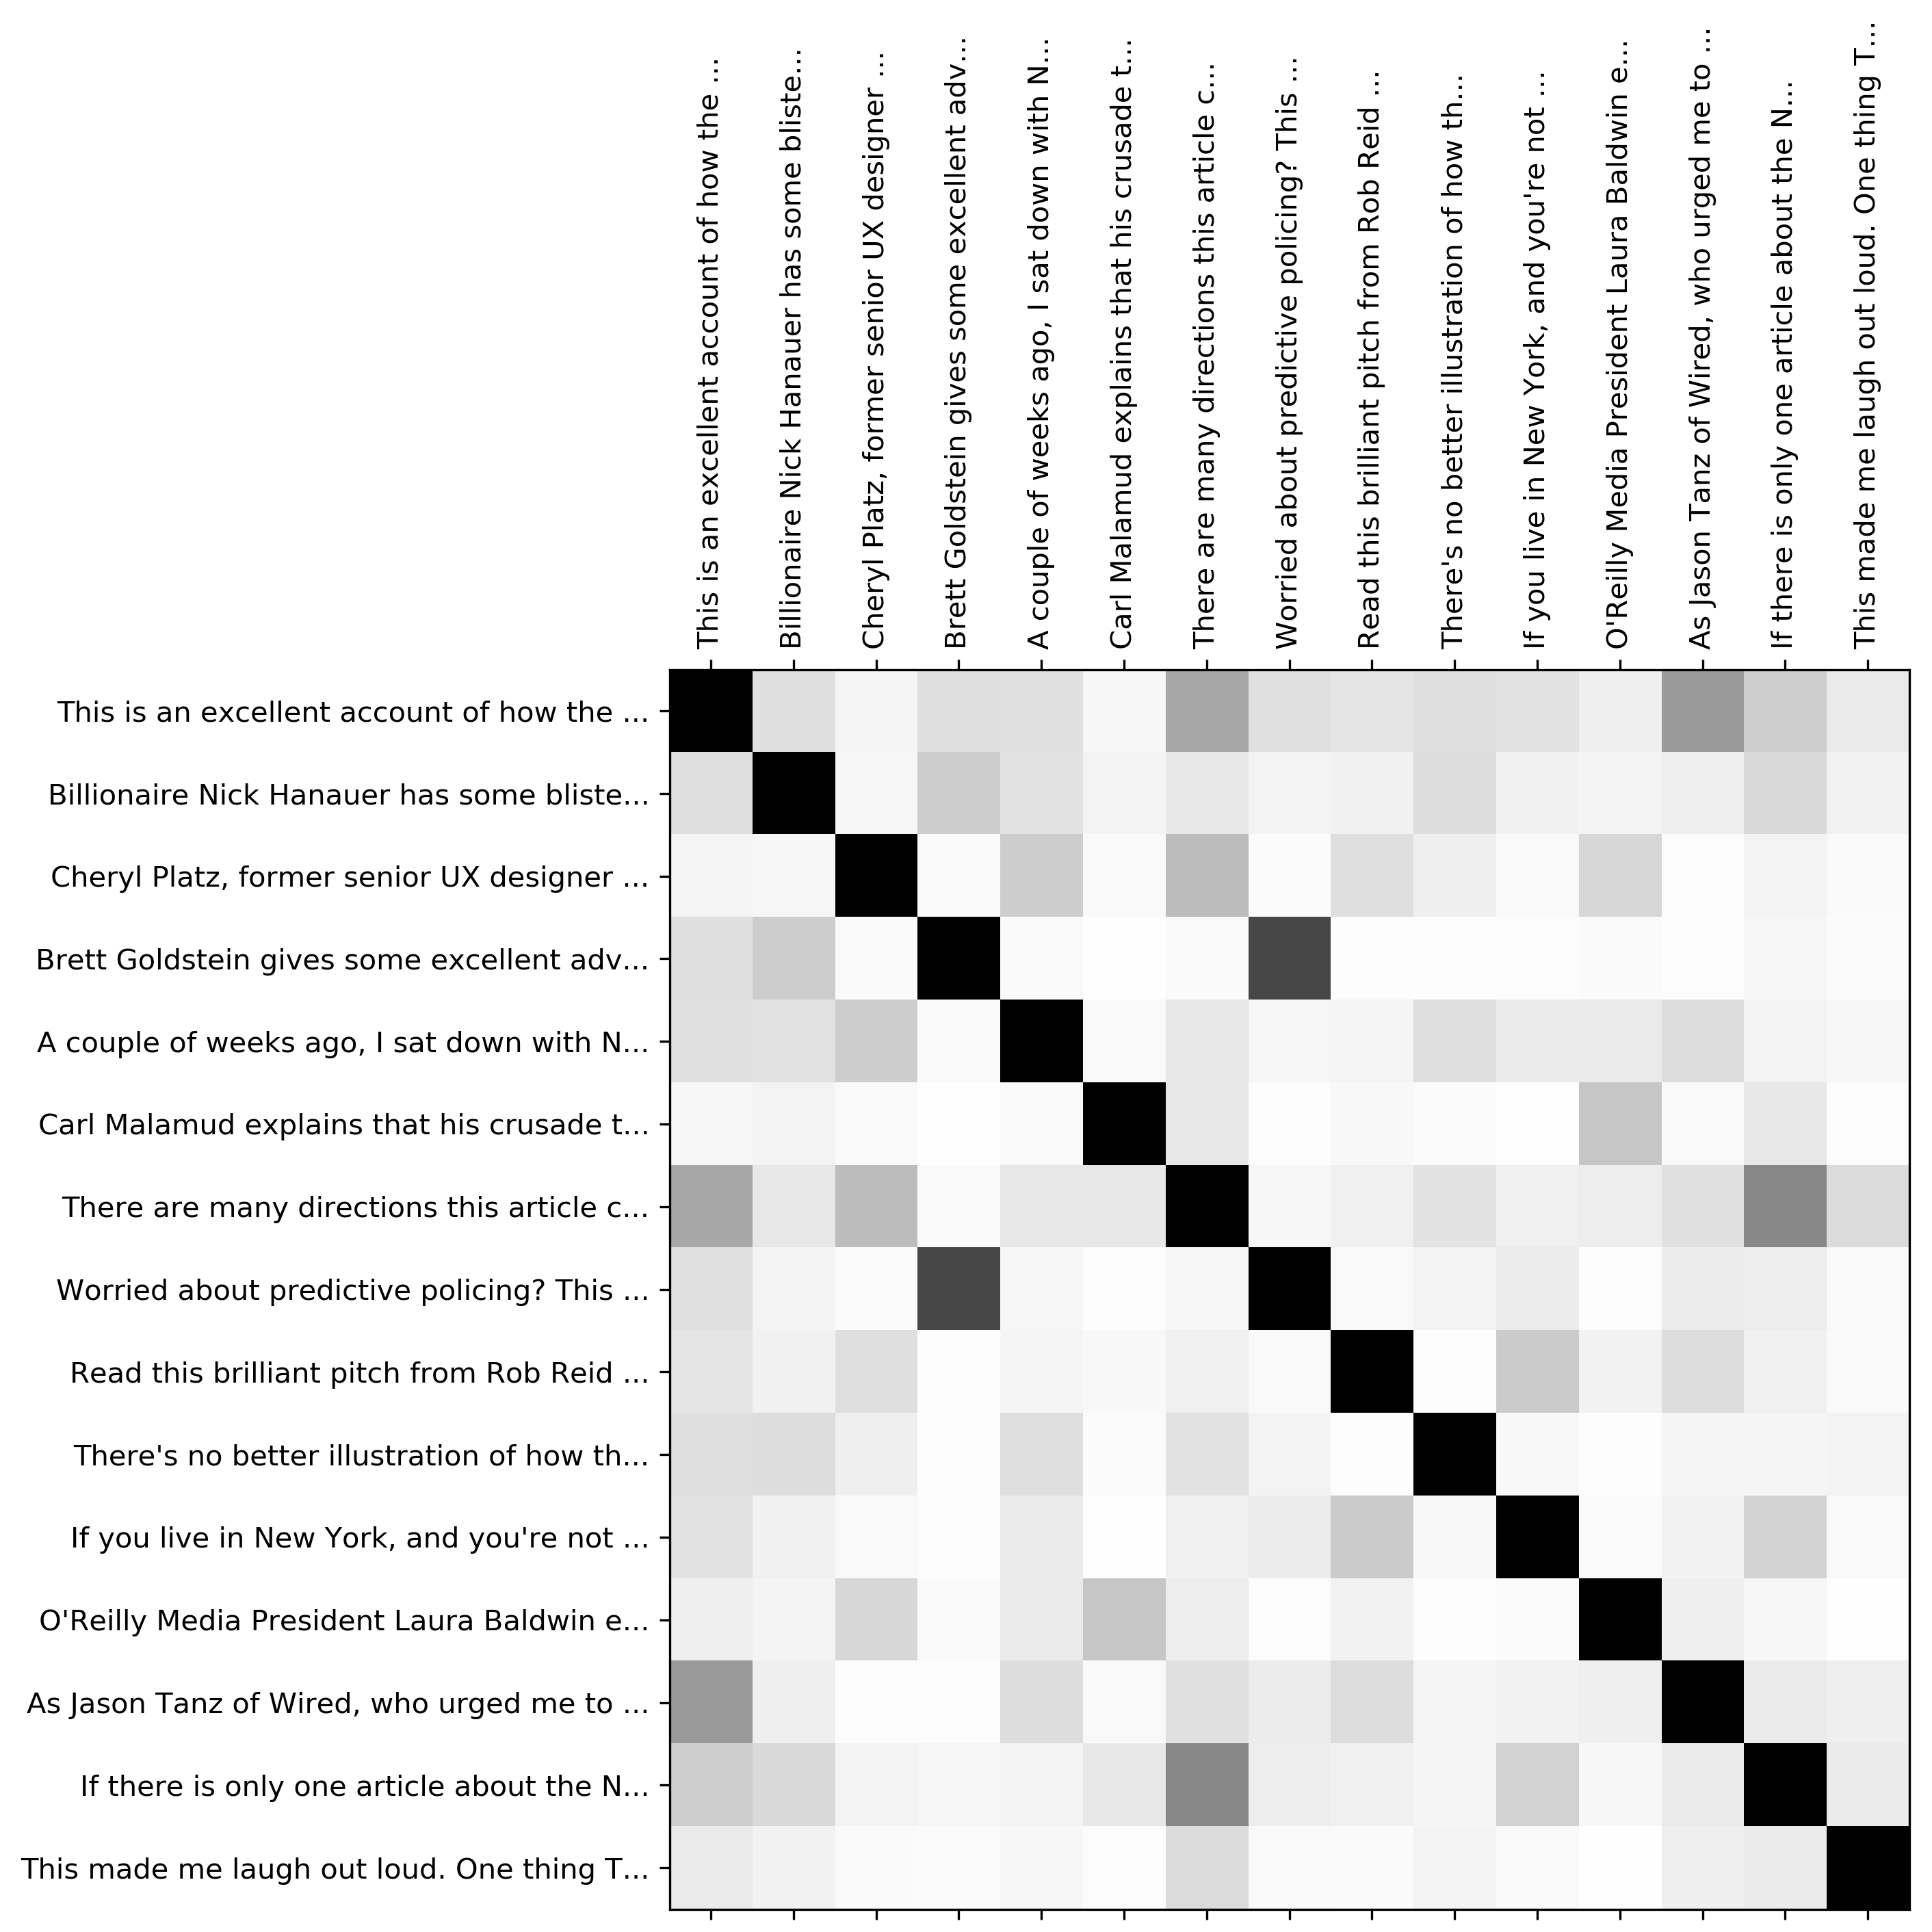

In [7]:
import numpy as np
import matplotlib.pyplot as plt # pip install matplotlib
%matplotlib inline

max_articles = 15

# Get the titles - the keys to the 'distances' dict
keys = list(distances.keys())

# Extract the article titles
titles = [l[:40].replace('\n',' ')+'...' for l in list(distances.keys())]

n_articles = len(titles) if len(titles) < max_articles else max_articles

# Initialize the matrix of appropriate size to store similarity scores
similarity_matrix = np.zeros((n_articles, n_articles))

# Loop over the cells in the matrix
for i in range(n_articles):
    for j in range(n_articles):
        # Retrieve the cosine distance between articles i and j
        d = distances[keys[i]][keys[j]]
        
        # Store the 'similarity' between articles i and j, defined as 1.0 - distance
        similarity_matrix[i, j] = 1.0 - d


# Create a figure and axes
fig = plt.figure(figsize=(8,8), dpi=300)
ax = fig.add_subplot(111)

# Visualize the matrix with colored squares indicating similarity
ax.matshow(similarity_matrix, cmap='Greys', vmin = 0.0, vmax = 0.2)

# Set regular ticks, one for each article in the collection
ax.set_xticks(range(n_articles))
ax.set_yticks(range(n_articles))

# Set the tick labels as the article titles
ax.set_xticklabels(titles)
ax.set_yticklabels(titles)

# Rotate the labels on the x-axis by 90 degrees
plt.xticks(rotation=90);

## Using NLTK to compute bigrams and collocations for a sentence

In [8]:
import nltk

sentence = "Mr. Green killed Colonel Mustard in the study with the " + \
           "candlestick. Mr. Green is not a very nice fellow."

print([bg for bg in nltk.ngrams(sentence.split(), 2)])
txt = nltk.Text(sentence.split())

txt.collocations()

[('Mr.', 'Green'), ('Green', 'killed'), ('killed', 'Colonel'), ('Colonel', 'Mustard'), ('Mustard', 'in'), ('in', 'the'), ('the', 'study'), ('study', 'with'), ('with', 'the'), ('the', 'candlestick.'), ('candlestick.', 'Mr.'), ('Mr.', 'Green'), ('Green', 'is'), ('is', 'not'), ('not', 'a'), ('a', 'very'), ('very', 'nice'), ('nice', 'fellow.')]
Mr. Green


## Using NLTK to compute collocations in a similar manner to the nltk.Text.collocations demo functionality

In [9]:
import json
import nltk
from nltk.metrics import association

# Load in human language data from wherever you've saved it
DATA = 'resources/ch05-textfiles/ch05-timoreilly.json'
data = json.loads(open(DATA).read())

# Number of collocations to find

N = 25

all_tokens = [token for post in data for token in post['content'].lower().split()]

finder = nltk.BigramCollocationFinder.from_words(all_tokens)
finder.apply_freq_filter(2)
finder.apply_word_filter(lambda w: w in nltk.corpus.stopwords.words('english'))
scorer = association.BigramAssocMeasures.jaccard
collocations = finder.nbest(scorer, N)

for collocation in collocations:
    c = ' '.join(collocation)
    print(c)

bottom, “copyright
brett goldstein
cabo pulmo
nbc press:here
nick hanauer
press:here tv
wood fired
yuval noah
child welfare
silicon valley
+jennifer pahlka
barre historical
computational biologist
drm-free ebooks
mikey dickerson
saul griffith
bay mini
credit card
east bay
on-demand economy,
white house
inca trail
italian granite
private sector
weeks ago,
